### **TEXT WRANGLING PIPELINE for NLP APPLICATION**

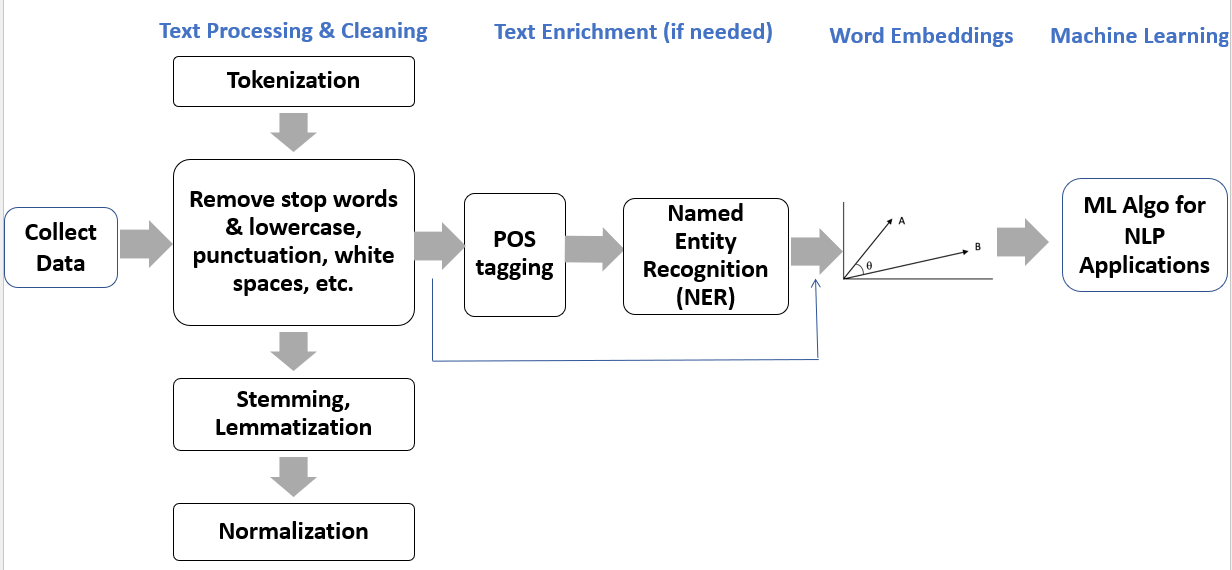

Text Processing and Cleaning can be thought of as Text Minning. It is shallower in nature (than NLP) as it does not consider text structure and context. 

The approaches that we can use for Text Mining stage are Bag of words, n-grams, stemming , lemmetization, etc.

In sklearn (Scikit learn - other frameworks/packages are Keras, PyTorch, TensorFlow, etc.) Bag of words is implemented as CountVectorizer  . It can tokenize (essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms), count the tokens i.e. counts ocurrence of words, you can add stop words 

**In this code snippet we will look at Text Mining part and create a WordCloud of positive, and negative comments.**


***************************************************************************************
*    Title: Amazon Review Data (2018)
*    Author: Jianmo Ni, UCSD
*    Date: 2018
*    Code version: NA
*    Availability: http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Appliances_5.json.gz
***************************************************************************************

In [2]:
from google.colab import drive
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

drive.mount('/content/drive')
readFile = '/content/drive/My Drive/Colab Notebooks/Appliances_5.json.gz'
review_df = pd.read_json(readFile, orient='records',compression='gzip', lines=True)

Mounted at /content/drive


In [3]:
print('Dataset size: {:,} words'.format(len(review_df)))
print(review_df.head(2))
print(review_df.columns)
print(review_df.describe())
print(review_df.info())

Dataset size: 2,277 words
   overall  verified   reviewTime  ... unixReviewTime vote image
0        5      True  08 22, 2013  ...     1377129600  NaN   NaN
1        5      True   02 8, 2016  ...     1454889600  NaN   NaN

[2 rows x 12 columns]
Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')
           overall  unixReviewTime
count  2277.000000    2.277000e+03
mean      4.499780    1.457410e+09
std       0.837723    5.639808e+07
min       1.000000    1.221523e+09
25%       4.000000    1.449274e+09
50%       5.000000    1.478650e+09
75%       5.000000    1.482278e+09
max       5.000000    1.523923e+09
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         2277 non-null   int64 
 1   verified 

In [11]:
review_df["reviewTime"] = pd.to_datetime(review_df["reviewTime"])
review_df = review_df[['asin','summary', 'reviewText', 'overall',  'reviewerID', 'reviewerName', 'reviewTime','unixReviewTime']]
print(review_df.head(3))
print(review_df.tail(3))
print("4th review comment is ------", review_df['reviewText'][4]) 
# nltk.corpus.gutenberg.fileids()  #Load NLTK corpora and select one corpus (text)
# corpus = gutenberg.raw(fileids='shakespeare-caesar.txt') #Choose Shakespeare Ceaser corpus
corpus = review_df['reviewText']

         asin        summary  ... reviewTime  unixReviewTime
0  B00009W3I4  Great product  ... 2013-08-22      1377129600
1  B00009W3PA     Five Stars  ... 2016-02-08      1454889600
2  B00009W3PA     Five Stars  ... 2015-08-05      1438732800

[3 rows x 8 columns]
            asin     summary  ... reviewTime  unixReviewTime
2274  B00570RQ0A  Five Stars  ... 2016-10-15      1476489600
2275  B00570RQ0A  Five Stars  ... 2016-01-05      1451952000
2276  B00W4YKCGC  Five Stars  ... 2016-12-05      1480896000

[3 rows x 8 columns]
4th review comment is ------ price delivery excellent


Normalize the data and perform data cleanup

1.   removing stopwords in english,
2.   removing new lines with whitespace
3.   removing special characters and white spaces using regex
4.   lemmatization

In [5]:
#import spacy
import nltk
from nltk.corpus import gutenberg
nltk.download('gutenberg') # multi line comment ''' '''
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import unicodedata
from string import punctuation
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer


#nlp = spacy.load('en', parse = False, tag=False, entity=False)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
remove_terms = punctuation + '0123456789'

#Retrieves the SnowballStemmer for a particular language.
sno = nltk.stem.SnowballStemmer('english')

#https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
wnl = WordNetLemmatizer()

#Removing Special Characters

def remove_special_characters(text):
  text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text)) #Before passing the text into the re.sub() function, convert data to string
  text = re.sub(r' +', ' ', text)   # remove extra whitespace
  return text

#Lemmatization

def lemmatize_text(text):
  text = ' '.join([wnl.lemmatize(w, pos="v") for w in nltk.word_tokenize(text)]) #tokenize the text before doing lemmatization else word broken down to chars
  #text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text]) #for spacy
  return text

def stemming_tokenizer(text):
  words = re.sub(r"[^A-Za-z0-9\-]", " ", text).lower().split()
  words = [sno.stem(word) for word in words]
  return words

#Removing Stopwords
def remove_stopwords(text, is_lower_case=False):
  tokens = tokenizer.tokenize(text) #tokenize text first else input will be character by character
  tokens = [token.strip() for token in tokens]
  if is_lower_case:
    filtered_tokens = [token for token in tokens if token not in stopword_list]
  else:
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
  filtered_text = ' '.join(filtered_tokens)    
  return filtered_text

#Remove Newlines Whitespace and Special Chars
def remove_newlineAddspaceforSpecialchars(text):
  text = re.sub(r'[\r|\n|\r\n]+', ' ',text)   # remove extra newlines
  special_char_pattern = re.compile(r'([{.(-)!}])')   # insert spaces between special characters to isolate them    
  text = special_char_pattern.sub(" \\1 ", text) 

  return text

#Normalize Corpus function
def normalize_corpus(corpus, html_stripping=False, contraction_expansion=False,
                     accented_char_removal=False, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True):
  normalized_corpus = []

  for doc in corpus:
    doc = doc.lower()
    doc = remove_newlineAddspaceforSpecialchars(doc)
    if text_lemmatization:
      doc = lemmatize_text(doc)

    if special_char_removal:
      doc = remove_special_characters(doc)

    if stopword_removal:
      doc = remove_stopwords(doc, is_lower_case=text_lower_case)

    normalized_corpus.append(doc)

  return normalized_corpus

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [6]:
print("before normalization")
print(corpus)
norm_corpus = normalize_corpus(corpus)
print("after normalization")
print(norm_corpus[0])
import numpy as np
df = pd.DataFrame(np.array(norm_corpus),columns = ['reviewText'])
print("converting list to pandas dataframe")
print(df)

before normalization
0       I like this as a vent as well as something tha...
1                                               good item
2                          Fit my new LG dryer perfectly.
3                          Good value for electric dryers
4                       Price and delivery was excellent.
                              ...                        
2272    Works great. I used it and an extension kit wi...
2273    Anyone who thinks they don't have a problem wi...
2274                                                 good
2275                                       washer washing
2276                          Great product fast shipping
Name: reviewText, Length: 2277, dtype: object
after normalization
like vent well something keep house warmer winter sand paint color house look great
converting list to pandas dataframe
                                             reviewText
0     like vent well something keep house warmer win...
1                                          

In [7]:
review_df['pos_neg'] = [1 if x > 3 else 0 for x in review_df.overall]

req_df = pd.concat([review_df['reviewText'], review_df['pos_neg']], axis=1)
req_positive = req_df[req_df['pos_neg']==1]
req_negative = req_df[req_df['pos_neg']==0]

print(review_df['pos_neg'].describe())
print(req_positive.describe())
print(req_negative.describe())

review_df["reviewText"] = df

count    2277.000000
mean        0.805446
std         0.395944
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: pos_neg, dtype: float64
       pos_neg
count   1834.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
       pos_neg
count    443.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0


The data contains roughly 20% of negative reviews (overall rating <= 3) and 80% of positive reviews

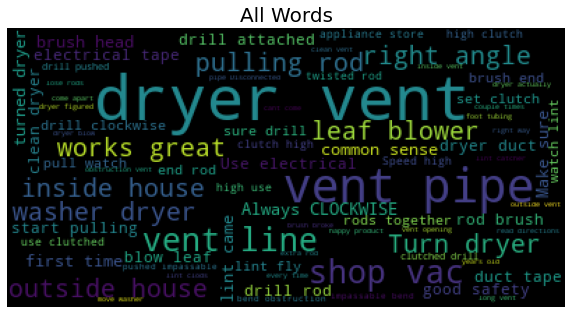

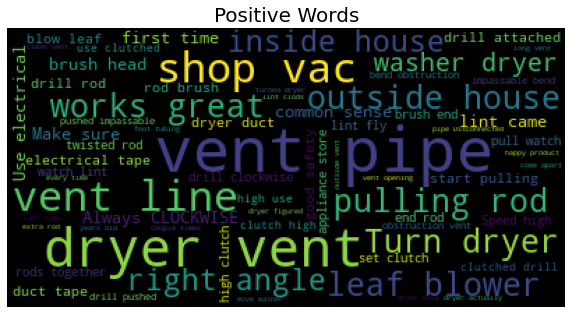

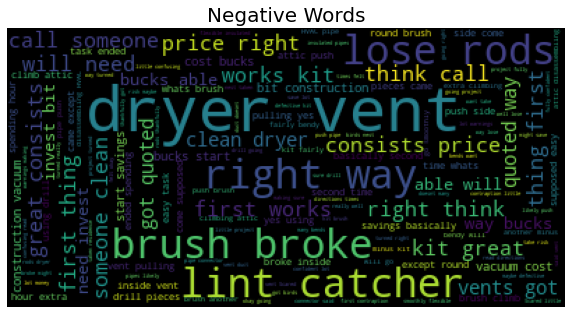

In [8]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
cloud = WordCloud(background_color='black', max_font_size=45, relative_scaling=1).generate(' '.join(req_df.reviewText))
fig = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.title("All Words", fontsize=20)
plt.imshow(cloud);

cloud = WordCloud(background_color='black', max_font_size=45, relative_scaling=1).generate(' '.join(req_positive.reviewText))
fig = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.title("Positive Words", fontsize=20)
plt.imshow(cloud);

cloud = WordCloud(background_color='black', max_font_size=45, relative_scaling=1).generate(' '.join(req_negative.reviewText))
fig = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.title("Negative Words", fontsize=20)
plt.imshow(cloud);